<a id='top'></a>

# Webscraping of TransferMarkt Data
##### Notebook to scrape raw data using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Last updated: 31/08/2020

![title](../../../img/transfermarkt-logo-banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-league) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/fifa-league/blob/master/FIFA%2020%20Fantasy%20Football%20League%20using%20TransferMarkt%20Player%20Valuations.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    `tqdm` for a clean progress bar;
*    `requests` for executing HTTP requests;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to scrape football data from [TransferMarkt](https://www.transfermarkt.co.uk/), using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using Tableau, PowerBI, Microsoft Excel.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
[TransferMarkt](https://www.transfermarkt.co.uk/) is a German-based website owned by [Axel Springer](https://www.axelspringer.com/en/) and is the leading website for the football transfer market. The website posts football related data, including: scores and results, football news, transfer rumours, and most usefully for us - calculated estimates ofthe market values for teams and individual players.

To read more about how these estimations are made, [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann does an excellent job of explaining how the estimations are made and their level of accuracy.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Data Dictionaries</a>
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `position_number`    | object     |
| `position_description`    | object     |
| `name`    | object     |
| `dob`    | object     |
| `nationality`    | object     |
| `value`    | object     |

### <a id='#section3.3'>3.3. Creating the DataFrame - scraping the data</a>
Before scraping data from [TransferMarkt](https://www.transfermarkt.co.uk/), we need to look at the top five leagues that we wish to scrape.

The web scraper for [TransferMarkt](https://www.transfermarkt.co.uk/) is made up of two parts:
1.    In the first part, the scraper takes the webpages for each of the individual leagues  e.g. The Premier League, and extract the hyperlinks to the pages of all the individual teams in the league table.
2.    In the second part the script, the webscraper uses the list of invidual teams hyperlinks collected in part 1 to then collect the hyperlinks for each of the players for those teams. From this, the scraper can then extract the information we need for each of these players.

This information collected for all the players is converted to a [pandas](http://pandas.pydata.org/) DataFrame from which we can view and manipulate the data.

An example webpage for a football league is the following: https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/GB1/plus/?saison_id=2019. As we can see, between the subdirectory path of `'/wettbewerb/'` and the `'/plus/'`, there is a 3 or 4 digit code. For The Premier League, the code is GB1. 

In order to scrape the webpages from [TransferMarkt](https://www.transfermarkt.co.uk/), the codes of the top five leagues need to be recorded from [TransferMarkt](https://www.transfermarkt.co.uk/), which are the following:

| League Name on FIFA    | Country    | Corresponding [TransferMarkt](https://www.transfermarkt.co.uk/) League Code    |
|------|-----|-----|
| LaLiga Santander    | Spain    | ES1    |
| Ligue 1 Conforama    | France    | FR1    |
| Premier League    | England    | GB1    |
| Serie A TIM    | Italy    | IT1    |
| Bundesliga    | Germany    | L1    |

See: https://fcpython.com/blog/scraping-lists-transfermarkt-saving-images

In [21]:
import requests
from bs4 import BeautifulSoup
from os.path  import basename

In [22]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

In [23]:
#Process League Table
page = 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1'
tree = requests.get(page, headers = headers)
soup = BeautifulSoup(tree.content, 'html.parser')

#Create an empty list to assign these values to
teamLinks = []

#Extract all links with the correct CSS selector
links = soup.select("a.vereinprofil_tooltip")

#We need the location that the link is pointing to, so for each link, take the link location. 
#Additionally, we only need the links in locations 1,3,5,etc. of our list, so loop through those only
for i in range(1,41,2):
    teamLinks.append(links[i].get("href"))
    
#For each location that we have taken, add the website before it - this allows us to call it later
for i in range(len(teamLinks)):
    teamLinks[i] = "https://www.transfermarkt.co.uk"+teamLinks[i]

In [24]:
#Create an empty list for our player links to go into
playerLinks = []

#Run the scraper through each of our 20 team links
for i in range(len(teamLinks)):

    #Download and process the team page
    page = teamLinks[i]
    tree = requests.get(page, headers = headers)
    soup = BeautifulSoup(tree.content, 'html.parser')

    #Extract all links
    links = soup.select("a.spielprofil_tooltip")
    
    #For each link, extract the location that it is pointing to
    for j in range(len(links)):
        playerLinks.append(links[j].get("href"))

    #Add the location to the end of the transfermarkt domain to make it ready to scrape
    for j in range(len(playerLinks)):
        playerLinks[j] = "https://www.transfermarkt.co.uk"+playerLinks[j]

    #The page list the players more than once - let's use list(set(XXX)) to remove the duplicates
    playerLinks = list(set(playerLinks))

In [25]:
len(playerLinks)

568

In [28]:
for i in range(len(playerLinks)):

    #Take site and structure html
    page = playerLinks[i]
    tree = requests.get(page, headers=headers)
    soup = BeautifulSoup(tree.content, 'html.parser')


    #Find image and save it with the player's name
    #Find the player's name
    name = soup.find_all("h1")
    
    #Use the name to call the image
    image = soup.find_all("img",{"title":name[0].text})
    
    #Extract the location of the image. We also need to strip the text after '?lm', so let's do that through '.split()'.
    src = image[0].get('src').split("?lm")[0]

    #Save the image under the player's name
    with open(name[0].text+".jpg","wb") as f:
        f.write(requests.get(src).content)

ConnectionError: HTTPSConnectionPool(host='www.transfermarkt.co.ukhttps', port=443): Max retries exceeded with url: //www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.ukhttps://www.transfermarkt.co.uk/david-de-gea/profil/spieler/59377 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1a1b398f90>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [27]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:75.0) Gecko/20100101 Firefox/75.0'
}

In [6]:
# List of leagues by code for which we want to scrape player data - Big 5 European leagues
lst_leagues = ['ES1', 'FR1', 'GB1', 'IT1', 'L1']

In [7]:
# Assign season by year to season variable e.g. 2014/15 season = 2014
season = '2020'    # 2020/21 season

In [8]:
from os.path  import basename

In [17]:
### Create empty list of links
playerLinks = []

url = "https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/{}/plus/?saison_id=2020"

### For loop to iteratre through each league page to collect the team links
for league in lst_leagues:
    print(f'Fetching Links from {league}')
    r = requests.Session() .get(url.format(league), headers=headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    link = [f"{url[:31]}{item.next_element.get('href')}" for item in soup.findAll(
        "td", class_="hauptlink no-border-links hide-for-small hide-for-pad")]
    playerLinks.extend(link)

### Print statement for the number of team links found
print(f'Collected {len(playerLinks)} Links')

Fetching Links from ES1
Fetching Links from FR1
Fetching Links from GB1
Fetching Links from IT1
Fetching Links from L1
Collected 98 Links


In [18]:
len(playerLinks)

98

In [20]:
for i in range(len(playerLinks)):

    #Take site and structure html
    page = playerLinks[i]
    tree = requests.get(page, headers=headers)
    soup = BeautifulSoup(tree.content, 'html.parser')


    #Find image and save it with the player's name
    #Find the player's name
    name = soup.find_all("h1")
    
    #Use the name to call the image
    image = soup.find_all("img",{"title":name[0].text})
    
    #Extract the location of the image. We also need to strip the text after '?lm', so let's do that through '.split()'.
    src = image[0].get('src').split("?lm")[0]

    #Save the image under the player's name
    with open(name[0].text+".jpg","wb") as f:
        f.write(requests.get(src).content)

IndexError: list index out of range

In [12]:
# Run this script to scrape latest version of this data from TransferMarkt

## Start timer
tic = datetime.datetime.now()


## Scrape TransferMarkt data
def main(url):
    with requests.Session() as req:
        
        ### Create empty list of links
        links = []
        
        ### For loop to iteratre through each league page to collect the team links
        for league in lst_leagues:
            print(f'Fetching Links from {league}')
            r = req.get(url.format(league), headers=headers)
            soup = BeautifulSoup(r.content, 'html.parser')
            link = [f"{url[:31]}{item.next_element.get('href')}" for item in soup.findAll(
                "td", class_="hauptlink no-border-links hide-for-small hide-for-pad")]
            links.extend(link)
        
        ### Print statement for the number of team links found
        print(f'Collected {len(links)} Links')
        
        
        
        """
        ### Create empty list of goals
        goals = []
        
        ### For loop to iteratre through each goal to collect each players information and assign to a DF
        for num, link in enumerate(links):
            print(f"Extracting Page# {num +1}")
            r = req.get(link, headers=headers)
            soup = BeautifulSoup(r.content, 'html.parser')
            target = soup.find("table", class_="items")
            pn = [pn.text for pn in target.select("div.rn_nummer")]
            pos = [pos.text for pos in target.findAll("td", class_=False)]
            name = [name.text for name in target.select("td.hide")]
            dob = [date.find_next(
                "td").text for date in target.select("td.hide")]
            nat = [" / ".join([a.get("alt") for a in nat.find_all_next("td")[1] if a.get("alt")]) for nat in target.findAll(
                "td", itemprop="athlete")]
            val = [val.get_text(strip=True)
                   for val in target.select('td.rechts.hauptlink')]
            goal = zip(pn, pos, name, dob, nat, val)
            df = pd.DataFrame(goal, columns=[
                              'position_number', 'position_description', 'name', 'dob', 'nationality', 'value'])
            goals.append(df)
                   
        ### Concontate the list of goals
        new = pd.concat(goals)
        
        ### Save DataFrame to a CSV
        new.to_csv(data_dir_tm + '/raw/' + f'players_big5_2021_raw_{today}.csv', index=None, header=True)
        """
        
## Call defined function
main("https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/{}/plus/?saison_id=2020")
#main(f'https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/{}/plus/?saison_id={season}')


## End timer
toc = datetime.datetime.now()


## Calculate time take
total_time = (toc-tic).total_seconds()
print(f'Time taken to scrape the data of all the players for the Big 5 leagues is: {total_time/60:0.2f} minutes.')

Fetching Links from ES1
Fetching Links from FR1
Fetching Links from GB1
Fetching Links from IT1
Fetching Links from L1
Collected 98 Links
Extracting Page# 1
Extracting Page# 2
Extracting Page# 3
Extracting Page# 4
Extracting Page# 5
Extracting Page# 6
Extracting Page# 7
Extracting Page# 8
Extracting Page# 9
Extracting Page# 10
Extracting Page# 11
Extracting Page# 12
Extracting Page# 13
Extracting Page# 14
Extracting Page# 15
Extracting Page# 16
Extracting Page# 17
Extracting Page# 18
Extracting Page# 19
Extracting Page# 20
Extracting Page# 21
Extracting Page# 22
Extracting Page# 23
Extracting Page# 24
Extracting Page# 25
Extracting Page# 26
Extracting Page# 27
Extracting Page# 28
Extracting Page# 29
Extracting Page# 30
Extracting Page# 31
Extracting Page# 32
Extracting Page# 33
Extracting Page# 34
Extracting Page# 35
Extracting Page# 36
Extracting Page# 37
Extracting Page# 38
Extracting Page# 39
Extracting Page# 40
Extracting Page# 41
Extracting Page# 42
Extracting Page# 43
Extracting 

AttributeError: 'str' object has no attribute 'text'

In [11]:
# Import data as a pandas DataFrame, df_tm_players_big5_2021_raw

## Look for most recent CSV file
list_of_files = glob.glob(data_dir_tm + '/raw/*')    # * means all if need specific format then *.csv
filepath_latest_tm = max(list_of_files, key=os.path.getctime)

## Load in most recently parsed CSV file
df_tm_player_top5_2021_raw = pd.read_csv(filepath_latest_tm)

### <a id='#section3.3'>3.4. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [12]:
# Display the first 5 rows of the raw DataFrame, df_tm_player_top5_2021_raw
df_tm_player_top5_2021_raw.head()

,position_number,position_description,name,dob,nationality,value
0,1,Goalkeeper,Marc-André ter Stegen,"Apr 30, 1992 (28)",Germany,£64.80m
1,13,Goalkeeper,Neto,"Jul 19, 1989 (31)",Brazil / Italy,£13.05m
2,26,Goalkeeper,Iñaki Peña,"Mar 2, 1999 (21)",Spain,£2.07m
3,15,Centre-Back,Clément Lenglet,"Jun 17, 1995 (25)",France,£43.20m
4,23,Centre-Back,Samuel Umtiti,"Nov 14, 1993 (26)",France / Cameroon,£28.80m


In [13]:
# Display the last 5 rows of the raw DataFrame, df_tm_player_top5_2021_raw
df_tm_player_top5_2021_raw.tail()

,position_number,position_description,name,dob,nationality,value
2885,18,Centre-Forward,Sergio Córdova,"Aug 9, 1997 (23)",Venezuela,£1.44m
2886,9,Centre-Forward,Fabian Klos,"Dec 2, 1987 (32)",Germany,£900Th.
2887,13,Centre-Forward,Sebastian Müller,"Jan 23, 2001 (19)",Germany,£270Th.
2888,36,Centre-Forward,Sven Schipplock,"Nov 8, 1988 (31)",Germany,£270Th.
2889,39,Centre-Forward,Prince Osei Owusu,"Jan 7, 1997 (23)",Germany / Ghana,£225Th.


In [14]:
# Print the shape of the raw DataFrame, df_tm_player_top5_2021_raw
print(df_tm_player_top5_2021_raw.shape)

(2890, 6)


In [15]:
# Print the column names of the raw DataFrame, df_tm_player_top5_2021_raw
print(df_tm_player_top5_2021_raw.columns)

Index(['position_number', 'position_description', 'name', 'dob', 'nationality',
       'value'],
      dtype='object')


The dataset has six features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [16]:
# Data types of the features of the raw DataFrame, df_tm_player_top5_2021_raw
df_tm_player_top5_2021_raw.dtypes

position_number         object
position_description    object
name                    object
dob                     object
nationality             object
value                   object
dtype: object

All six of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [19]:
# Info for the raw DataFrame, df_tm_player_top5_2021_raw
df_tm_player_top5_2021_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   position_number       2890 non-null   object
 1   position_description  2890 non-null   object
 2   name                  2890 non-null   object
 3   dob                   2890 non-null   object
 4   nationality           2890 non-null   object
 5   value                 2854 non-null   object
dtypes: object(6)
memory usage: 135.6+ KB


In [20]:
# Description of the raw DataFrame, df_tm_player_top5_2021_raw, showing some summary statistics for each numberical column in the DataFrame
df_tm_player_top5_2021_raw.describe()

,position_number,position_description,name,dob,nationality,value
count,2890,2890,2890,2890,2890,2854
unique,82,14,2883,2258,418,149
top,-,Centre-Back,Danilo,"Mar 25, 2000 (20)",Spain,£1.08m
freq,476,511,3,5,404,89


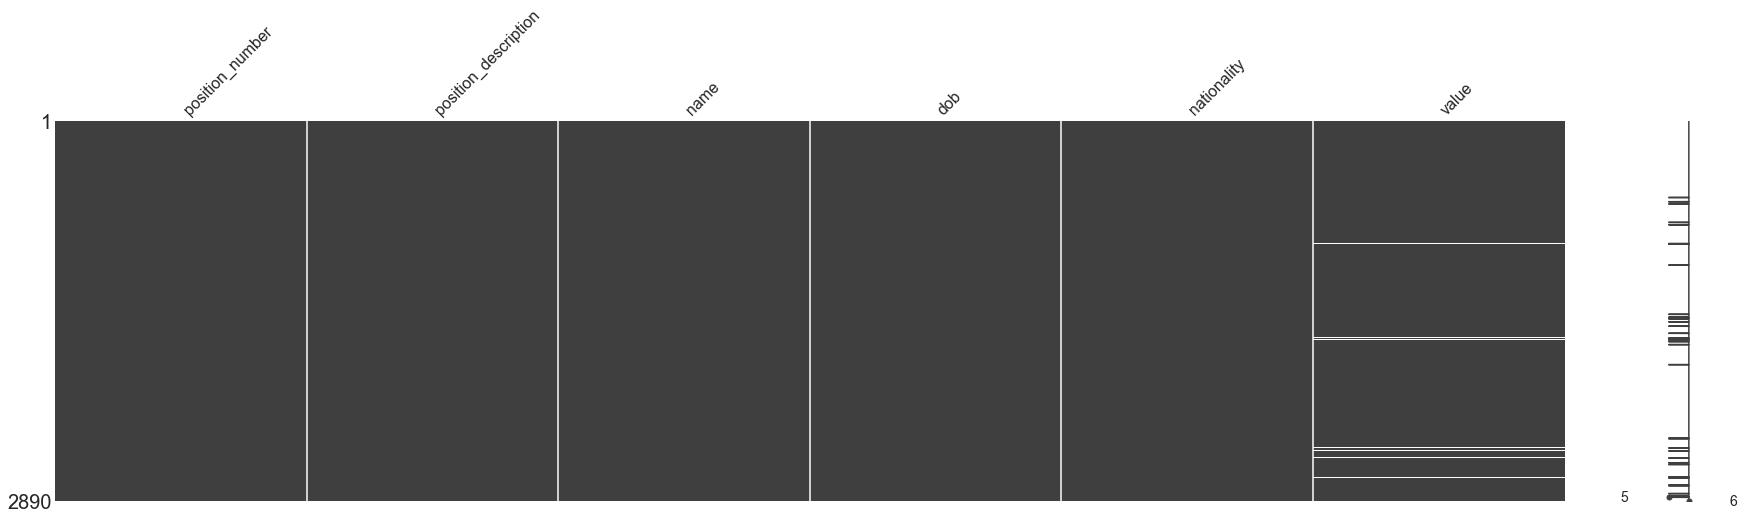

In [21]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_player_top5_2021_raw
msno.matrix(df_tm_player_top5_2021_raw, figsize = (30, 7))

In [22]:
# Counts of missing values
tm_null_value_stats = df_tm_player_top5_2021_raw.isnull().sum(axis=0)
tm_null_value_stats[tm_null_value_stats != 0]

value    36
dtype: int64

The visualisation shows us very quickly that there a few missing values in the `value` column, but otherwise the dataset is complete.

## <a id='#section4'>4. Data Engineering</a>

### <a id='#section4.1'>4.1. Introduction</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.2'>4.2. Assign Raw DataFrames to New Engineered DataFrames</a>

In [23]:
# Assign Raw DataFrame to new Engineered DataFrame
df_tm_player_top5_2021 = df_tm_player_top5_2021_raw

### <a id='#section4.2'>4.2. String Cleaning</a>

##### Name

In [24]:
df_tm_player_top5_2021['name_lower'] = df_tm_player_top5_2021['name'].str.normalize('NFKD')\
                                                                     .str.encode('ascii', errors='ignore')\
                                                                     .str.decode('utf-8')\
                                                                     .str.lower()

In [25]:
# First Name Lower
df_tm_player_top5_2021['firstname_lower'] = df_tm_player_top5_2021['name_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_tm_player_top5_2021['lastname_lower'] = df_tm_player_top5_2021['name_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_tm_player_top5_2021['firstinitial_lower'] = df_tm_player_top5_2021['name_lower'].astype(str).str[0]

##### DoB and Age
The `dob` column is messy and contains both the date of birth as a string and also the age in brackets.

This string cleaning consists of two parts, firstly, to split this apart into their seperate components. However, once the `age` column is created, we will replaced this by determining the current age using the Python [datetime](https://docs.python.org/3/library/datetime.html) module.

In [26]:
# DoB string cleaning to create birth_date and age columns
df_tm_player_top5_2021[['birth_date', 'age']] = df_tm_player_top5_2021['dob'].str.extract(r'(.+) \((\d+)\)')

##### Nationality
For the nationality, some of the players have duel nationality.

For example, [Claudio Pizarro](https://www.transfermarkt.co.uk/claudio-pizarro/profil/spieler/532) is a Peruvian-born player who has has made 85 appearances for Peru, scoring 20 goals. However, his citizenship according to [TransferMarkt](https://www.transfermarkt.co.uk/) is 'Peru / Italy'. For our needs, we only want to know the country the player is eligible to play for, not their full heritage which from observations is always the first part of the string. We'll therefore be discarding anything after the first space in the string to form a new `playing_country` column.

In [27]:
# Take the first nationality i.e. text before the first space, ex. 'Peru / Italy'
df_tm_player_top5_2021['playing_country'] = df_tm_player_top5_2021['nationality'].str.split(' /').str[0]

##### Value
The values of the players have prefixes (£), commas, spaces, and suffixes (m, k) that need to cleaned and replaced before converting to a numerical value.

In [28]:
# Value string cleaning from shortened string value to full numerical value

## Convert 'm' to '000000'
df_tm_player_top5_2021['value'] = df_tm_player_top5_2021['value'].str.replace('m','0000')

## Convert 'k' to '000'
df_tm_player_top5_2021['value'] = df_tm_player_top5_2021['value'].str.replace('k','000')

## Convert 'Th' to '000'
df_tm_player_top5_2021['value'] = df_tm_player_top5_2021['value'].str.replace('Th','000')

## Remove '.'
df_tm_player_top5_2021['value'] = df_tm_player_top5_2021['value'].str.replace('.','')

## Remove '£' sign
df_tm_player_top5_2021['value'] = df_tm_player_top5_2021['value'].str.replace('£','')

## Remove '-'
df_tm_player_top5_2021['value'] = df_tm_player_top5_2021['value'].str.replace('-','')

## Remove '¬†¬†'
df_tm_player_top5_2021['value'] = df_tm_player_top5_2021['value'].str.replace('¬†¬†','')

## Remove gaps
df_tm_player_top5_2021['value'] = df_tm_player_top5_2021['value'].str.replace(' ','')

##### Position

In [35]:
# List unique values in the df_tm_player_top5_2021['position_description'] column
df_tm_player_top5_2021['position_description'].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Second Striker', 'Centre-Forward',
       'Right Midfield', 'Left Midfield', 'Midfielder'], dtype=object)

In [36]:
dict_positions={
    'Goalkeeper': 'Goalkeeper',
    'Centre-Back': 'Defender',
    'Left-Back': 'Defender',
    'Right-Back': 'Defender',
    'Defensive Midfield': 'Midfielder',
    'Central Midfield': 'Midfielder',
    'Attacking Midfield': 'Midfielder',
    'Left Winger': 'Forward',
    'Right Winger': 'Forward',
    'Second Striker': 'Forward',
    'Centre-Forward': 'Forward',
    'Right Midfield': 'Midfielder',
    'Left Midfield': 'Midfielder',
    'Midfielder': 'Midfielder'
}

In [37]:
df_tm_player_top5_2021['position_cleaned'] = df_tm_player_top5_2021['position_description'].map(dict_positions)

### <a id='#section4.3'>4.3. Converting Data Types</a>

##### DoB
First we need to convert the `dob` column from the `object` data type to `datetime64[ns]`, again using the [.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.

In [44]:
df_tm_player_top5_2021

,position_number,position_description,name,dob,nationality,value,name_lower,firstname_lower,lastname_lower,firstinitial_lower,birth_date,age,playing_country,position_cleaned
0,1,Goalkeeper,Marc-André ter Stegen,"Apr 30, 1992 (28)",Germany,64800000,marc-andre ter stegen,marc-andre,stegen,m,"Apr 30, 1992",28,Germany,Goalkeeper
1,13,Goalkeeper,Neto,"Jul 19, 1989 (31)",Brazil / Italy,13050000,neto,neto,neto,n,"Jul 19, 1989",31,Brazil,Goalkeeper
2,26,Goalkeeper,Iñaki Peña,"Mar 2, 1999 (21)",Spain,2070000,inaki pena,inaki,pena,i,"Mar 2, 1999",21,Spain,Goalkeeper
3,15,Centre-Back,Clément Lenglet,"Jun 17, 1995 (25)",France,43200000,clement lenglet,clement,lenglet,c,"Jun 17, 1995",25,France,Defender
4,23,Centre-Back,Samuel Umtiti,"Nov 14, 1993 (26)",France / Cameroon,28800000,samuel umtiti,samuel,umtiti,s,"Nov 14, 1993",26,France,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,18,Centre-Forward,Sergio Córdova,"Aug 9, 1997 (23)",Venezuela,1440000,sergio cordova,sergio,cordova,s,"Aug 9, 1997",23,Venezuela,Forward
2886,9,Centre-Forward,Fabian Klos,"Dec 2, 1987 (32)",Germany,900000,fabian klos,fabian,klos,f,"Dec 2, 1987",32,Germany,Forward
2887,13,Centre-Forward,Sebastian Müller,"Jan 23, 2001 (19)",Germany,270000,sebastian muller,sebastian,muller,s,"Jan 23, 2001",19,Germany,Forward
2888,36,Centre-Forward,Sven Schipplock,"Nov 8, 1988 (31)",Germany,270000,sven schipplock,sven,schipplock,s,"Nov 8, 1988",31,Germany,Forward


In [45]:
df_tm_player_top5_2021.dtypes

position_number         object
position_description    object
name                    object
dob                     object
nationality             object
value                   object
name_lower              object
firstname_lower         object
lastname_lower          object
firstinitial_lower      object
birth_date              object
age                     object
playing_country         object
position_cleaned        object
dtype: object

In [47]:
df_tm_player_top5_2021.to_csv(data_dir + f'test_tm_{today}.csv', index=None, header=True)

In [50]:
df_tm_player_top5_2021 = df_tm_player_top5_2021.replace('N/A', '', regex=True)

In [51]:
# Convert birth_date from string to datetime64[ns]
df_tm_player_top5_2021['birth_date'] = pd.to_datetime(df_tm_player_top5_2021['birth_date'])

##### Age
The calculated `age` column needs to be converted from a float to an integer, with all null values ignored, using to [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) method.

In [52]:
# Date and time manipulation
from datetime import datetime

In [53]:
# Redetermine the age using the newly created birth_date column (after formatted to datetime data type)

## Remove all not numeric values use to_numeric with parameter errors='coerce' - it replaces non numeric to NaNs
df_tm_player_top5_2021['age'] = pd.to_numeric(df_tm_player_top5_2021['age'], errors='coerce')

## Convert floats to integers and leave null values
df_tm_player_top5_2021['age'] = np.nan_to_num(df_tm_player_top5_2021['age']).astype(int)

## Calculate current age
today = datetime.today()
df_tm_player_top5_2021['age'] = df_tm_player_top5_2021['birth_date'].apply(lambda x: today.year - x.year - 
                                                                               ((today.month, today.day) < (x.month, x.day)) 
                                                                          )


# df_tm_player_top5_2021['age'] = pd.to_numeric(ddf_tm_player_top5_2021['age'], downcast='signed')

##### Value
The `value` column needs to be converted from a string to an integer using to [to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) method.

In [54]:
# Convert string to integer
df_tm_player_top5_2021['value'] = pd.to_numeric(df_tm_player_top5_2021['value'])

##### Position
...

In [55]:
sorted(df_tm_player_top5_2021['position_description'].unique())

['Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Midfielder',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker']

In [56]:
dict_positions_tm = {
    'Attacking Midfield': 'Midfielder',
    'Central Midfield': 'Midfielder',
    'Centre-Back': 'Defender',
    'Centre-Forward': 'Forward',
    'Defensive Midfield': 'Midfielder',
    'Forward': 'Forward',
    'Goalkeeper': 'Goalkeeper',
    'Left Midfield': 'Midfielder',
    'Left Winger': 'Forward',
    'Left-Back': 'Defender',
    'Right Midfield': 'Midfielder',
    'Right Winger': 'Forward',
    'Right-Back': 'Defender',
    'Second Striker': 'Forward'
}

In [57]:
df_tm_player_top5_2021['position_description_cleaned'] = df_tm_player_top5_2021['position_description'].map(dict_positions_tm)

### <a id='#section4.4'>4.4. Create New Attributes</a>
Create new attributes for birth month and birth year.

In [58]:
df_tm_player_top5_2021['birth_year'] = pd.DatetimeIndex(df_tm_player_top5_2021['birth_date']).year
df_tm_player_top5_2021['birth_month'] = pd.DatetimeIndex(df_tm_player_top5_2021['birth_date']).month

### <a id='#section4.5'>4.5. Columns of Interest</a>
We are interested in the following thirteen columns in the [TransferMarkt](https://www.transfermarkt.co.uk/) dataset:
*    `name`
*    `name_lower`
*    `firstinitial_lower`
*    `firstname_lower`
*    `lastname_lower`
*    `position_description`
*    `position_description_cleaned`
*    `value`
*    `birth_date`
*    `birth_year`
*    `birth_month`
*    `age`
*    `playing_country`

In [59]:
# Select columns of interest
df_tm_player_top5_2021 = df_tm_player_top5_2021[['name', 'name_lower', 'firstinitial_lower', 'firstname_lower', 'lastname_lower', 'position_description', 'position_description_cleaned', 'value', 'birth_date', 'birth_year', 'birth_month', 'age', 'playing_country']]

### <a id='#section4.6'>4.6. Split Dataset into Outfielder Players and Goalkeepers</a>

In [60]:
# Assign df_tm as a new DataFrame - df_tm_player_top5_all_2021_all, to represent all the players
df_tm_player_top5_all_2021 = df_tm_player_top5_2021

# Filter rows for position_description is not equal to 'Goalkeeper'
df_tm_player_top5_outfield_2021 = df_tm_player_top5_all_2021[df_tm_player_top5_all_2021['position_description'] != 'Goalkeeper']

# Filter rows for position_description are equal to 'Goalkeeper'
df_tm_player_top5_goalkeeper_2021 = df_tm_player_top5_all_2021[df_tm_player_top5_all_2021['position_description'] == 'Goalkeeper']

In [61]:
df_tm_player_top5_all_2021.head()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
0,Marc-André ter Stegen,marc-andre ter stegen,m,marc-andre,stegen,Goalkeeper,Goalkeeper,64800000.0,1992-04-30,1992.0,4.0,28.0,Germany
1,Neto,neto,n,neto,neto,Goalkeeper,Goalkeeper,13050000.0,1989-07-19,1989.0,7.0,31.0,Brazil
2,Iñaki Peña,inaki pena,i,inaki,pena,Goalkeeper,Goalkeeper,2070000.0,1999-03-02,1999.0,3.0,21.0,Spain
3,Clément Lenglet,clement lenglet,c,clement,lenglet,Centre-Back,Defender,43200000.0,1995-06-17,1995.0,6.0,25.0,France
4,Samuel Umtiti,samuel umtiti,s,samuel,umtiti,Centre-Back,Defender,28800000.0,1993-11-14,1993.0,11.0,26.0,France


In [62]:
df_tm_player_top5_outfield_2021.head()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
3,Clément Lenglet,clement lenglet,c,clement,lenglet,Centre-Back,Defender,43200000.0,1995-06-17,1995.0,6.0,25.0,France
4,Samuel Umtiti,samuel umtiti,s,samuel,umtiti,Centre-Back,Defender,28800000.0,1993-11-14,1993.0,11.0,26.0,France
5,Gerard Piqué,gerard pique,g,gerard,pique,Centre-Back,Defender,18000000.0,1987-02-02,1987.0,2.0,33.0,Spain
6,Jean-Clair Todibo,jean-clair todibo,j,jean-clair,todibo,Centre-Back,Defender,12600000.0,1999-12-30,1999.0,12.0,20.0,France
7,Ronald Araújo,ronald araujo,r,ronald,araujo,Centre-Back,Defender,9000000.0,1999-03-07,1999.0,3.0,21.0,Uruguay


In [63]:
df_tm_player_top5_goalkeeper_2021.head()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
0,Marc-André ter Stegen,marc-andre ter stegen,m,marc-andre,stegen,Goalkeeper,Goalkeeper,64800000.0,1992-04-30,1992.0,4.0,28.0,Germany
1,Neto,neto,n,neto,neto,Goalkeeper,Goalkeeper,13050000.0,1989-07-19,1989.0,7.0,31.0,Brazil
2,Iñaki Peña,inaki pena,i,inaki,pena,Goalkeeper,Goalkeeper,2070000.0,1999-03-02,1999.0,3.0,21.0,Spain
32,Thibaut Courtois,thibaut courtois,t,thibaut,courtois,Goalkeeper,Goalkeeper,54000000.0,1992-05-11,1992.0,5.0,28.0,Belgium
33,Andriy Lunin,andriy lunin,a,andriy,lunin,Goalkeeper,Goalkeeper,2430000.0,1999-02-11,1999.0,2.0,21.0,Ukraine


### <a id='#section4.7'>4.7. Exporting the Engineered DataFrames</a>
Export the three engineered [TransferMarkt](https://www.transfermarkt.co.uk/) DataFrames as CSV files.

In [64]:
# Datetime
import datetime
from datetime import date
import time

In [65]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [66]:
# Export the three DataFrames
df_tm_player_top5_all_2021.to_csv(data_dir_tm + '/engineered/all/' + f'all_big5_1920_{today}.csv', index=None, header=True)
df_tm_player_top5_outfield_2021.to_csv(data_dir_tm + '/engineered/player/' + f'outfield_big5_1920_{today}.csv', index=None, header=True)
df_tm_player_top5_goalkeeper_2021.to_csv(data_dir_tm + '/engineered/goalkeeper/' + f'goalkeeper_big5_1920_{today}.csv', index=None, header=True)

Now we have created three pandas DataFrames and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5).

## <a id='#section5'>5. Exploratory Data Analysis</a>

### <a id='#section5.1'>5.1. Introduction</a>
...

### <a id='#section5.2'>5.2. ...</a>
...

## <a id='#section6'>6. Summary</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

### <a id='#section9.1'>8.1. Bibliography</a>

#### Data and Web Scraping
*    [FBref](https://fbref.com/) for the data to scrape
*    FBref statement for using StatsBomb's data: https://fbref.com/en/statsbomb/
*    [StatsBomb](https://statsbomb.com/) providing the data to FBref
*    [FBref_EPL GitHub repository](https://github.com/chmartin/FBref_EPL) by [chmartin](https://github.com/chmartin) for the original web scraping code
*    [Scrape-FBref-data GitHub repository](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902) for the revised web scraping code for the new FBref metrics
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).
*    [tyrone_mings GitHub repository](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS)
*    [Python Package Index (PyPI) tyrone-mings library](https://pypi.org/project/tyrone-mings/).

#### Countries
*    [Comparison of alphabetic country codes Wiki](https://en.wikipedia.org/wiki/Comparison_of_alphabetic_country_codes)

## <a id='#section9.2'>8.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)